In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [102]:
 path = 'data.csv'
data = pd.read_csv(path)

In [103]:
data.head

<bound method NDFrame.head of            date  date_number  increased_cases  total_cases  increased_deaths  \
0    2019/12/31            0               27           27               0.0   
1      2020/1/1            1                0           27               0.0   
2      2020/1/2            2                0           27               0.0   
3      2020/1/3            3               17           44               0.0   
4      2020/1/4            4                0           44               0.0   
..          ...          ...              ...          ...               ...   
106   2020/4/15          106            75246      1942729               NaN   
107   2020/4/16          107            81419      2024148               NaN   
108   2020/4/17          108            84339      2108487               NaN   
109   2020/4/18          109            83324      2191811               NaN   
110   2020/4/19          110            84121      2275932               NaN   

     tota

Text(0, 0.5, 'Total Number')

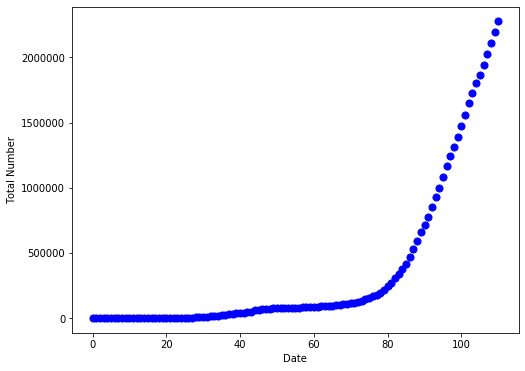

In [104]:
flg, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data.date_number, data.total_cases, s=50, c='b', label='Data distribution diagram')

ax.set_xlabel('Date')
ax.set_ylabel("Total Number")

one variable 1 r-squared: 0.5549369981019856
rmse is: total_cases    411780.958916
dtype: float64
one variable 4 r-squared: 0.9937592660854638
rmse is: total_cases    48761.083484
dtype: float64
one variable 7 r-squared: 0.9992552461035882
rmse is: total_cases    16844.646688
dtype: float64


/Users/wangxiao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Unrecognized location 'upp er left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


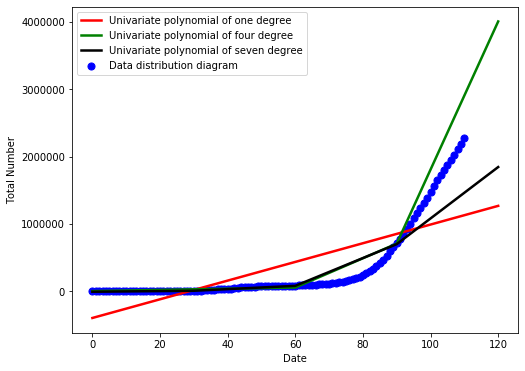

In [105]:
flg, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data.date_number, data.total_cases, s=50, c='b', label='Data distribution diagram')

ax.set_xlabel('Date')
ax.set_ylabel('Total Number')

# 划分数据集
data.insert(0, 'Ones', 1)
features = data.iloc[:, 2:3]
# 对应increased_cases 第3列数据
labels = data.iloc[:, 4:5]
# 对应total_cases 第4列数据
# labels = data.iloc[:, 4:5]
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

for i in range(1, 8, 3):
    quadratic_featurizer = PolynomialFeatures(degree=i)
    X_train_quadratic = quadratic_featurizer.fit_transform(x_train)
    regressor_model = linear_model.LinearRegression()
    regressor_model.fit(X_train_quadratic, y_train)
    xx = np.linspace(0, 120, 5)
    xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
    yy_predict = regressor_model.predict(xx_quadratic)
    if i == 1:
        plt.plot(xx, yy_predict, 'r-', linewidth=2.5, label='Univariate polynomial of one degree')
    elif i == 4:
        plt.plot(xx, yy_predict, 'g-', linewidth=2.5, label='Univariate polynomial of four degree')
    elif i == 7:
        plt.plot(xx, yy_predict, 'k-', linewidth=2.5, label='Univariate polynomial of seven degree')
    X_test_quadratic = quadratic_featurizer.transform(x_test)
    
    score = regressor_model.score(X_test_quadratic, y_test)
    print('one variable', i, 'r-squared:', score)
    
    def rmse(predictions, targets):
        return np.sqrt(((predictions - targets) ** 2).mean())
    rmse_val = rmse(regressor_model.predict(X_test_quadratic), y_test)
    print("rmse is: " + str(rmse_val))

# plt.xlim(0,100)
# plt.ylim(0,100000)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
ax.legend(loc='upp er left')
plt.show()